###### HOTEL REVIEW SENTIMENT ANALYSIS

** INDEX: **

###### 1. [IMPORT LIBRARIES, SET DIRECTORY & LOAD DATA](#IMPORT-LIBRARIES,-SET-DIRECTORY-&-LOAD-DATA)
###### 2. [CHECK MISSING VALUES & PERCENTAGE OF MISSING VALUES](#CHECK-MISSING-VALUES-&-PERCENTAGE-OF-MISSING-VALUES)
###### 3. [Checking for the DISTRIBUTION of DEFAULT](#Checking-for-the-DISTRIBUTION-of-DEFAULT)
###### 4. [DROP IRRELEVANT COLUMNS](#DROP-IRRELEVANT-COLUMNS)
###### 5. [APPLY FIRST LEVEL OF TEXT CLEANING](#APPLY-FIRST-LEVEL-OF-TEXT-CLEANING)
###### 6. [ADD COLUMN WITH FIRST-LEVEL CLEANED DATA](#ADD-COLUMN-WITH-FIRST-LEVEL-CLEANED-DATA)
###### 7. [APPLY SECOND LEVEL OF TEXT CLEANING](#APPLY-SECOND-LEVEL-OF-TEXT-CLEANING)
###### 8. [ADD COLUMN WITH SECOND-LEVEL CLEANED DATA](#ADD-COLUMN-WITH-SECOND-LEVEL-CLEANED-DATA)
###### 9. [MODEL SPLITTING - TRAIN_TEST_SPLIT](#MODEL-SPLITTING-TRAIN_TEST_SPLIT)
###### 10. [CREATE INSTANCES FOR TFIDFVECTORIZER AND LOGISTIC_REGRESSION](#CREATE-INSTANCES-FOR-TFIDFVECTORIZER-AND-LOGISTIC_REGRESSION)
###### 11. [CREATE MODEL AND FIT MODEL ON TRAINING SET](#CREATE-MODEL-AND-FIT-MODEL-ON-TRAINING-SET)
###### 12. [DO PREDICTION ON TEST_SET AND CREATE CONFUSION_MATRIX](#DO-PREDICTION-ON-TEST_SET-AND-CREATE-CONFUSION_MATRIX)
###### 13. [MODEL PREDICTIONS](#MODEL-PREDICTIONS)
###### 14. [TESTING AN EXAMPLE](#TESTING-AN-EXAMPLE)

###### IMPORT LIBRARIES, SET DIRECTORY & LOAD DATA

In [3]:
# WARNINGS
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [5]:
import os
os.chdir(r'C:\Users\Asus\Desktop\Data Science Master Program\004 ML Practise\004_DEEP_LEARNING\NLP')
Reviewdata = pd.read_csv('train_hotelReview.csv')
Reviewdata.head(10)

# DATA SOURCE: https://www.kaggle.com/anu0012/hotel-review/data

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
5,id10331,We had - rooms. One was very nice and clearly ...,InternetExplorer,Desktop,happy
6,id10332,My husband and I have stayed in this hotel a f...,Firefox,Tablet,not happy
7,id10333,My wife & I stayed in this glorious city a whi...,Google Chrome,Mobile,happy
8,id10334,My boyfriend and I stayed at the Fairmont on a...,Internet Explorer,Desktop,happy
9,id10335,"Wonderful staff, great location, but it was de...",Chrome,Tablet,not happy


In [6]:
Reviewdata.shape

(38932, 5)

In [7]:
Reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
User_ID         38932 non-null object
Description     38932 non-null object
Browser_Used    38932 non-null object
Device_Used     38932 non-null object
Is_Response     38932 non-null object
dtypes: object(5)
memory usage: 1.5+ MB


In [8]:
Reviewdata.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id11314,1
Description,38932,38932,After getting a very cheap deal on priceline f...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


###### CHECK MISSING VALUES & PERCENTAGE OF MISSING VALUES

In [10]:
count = Reviewdata.isnull().sum().sort_values(ascending = False)
percentage = ((Reviewdata.isnull().sum() / len(Reviewdata) * 100)).sort_values(ascending = False)
missing_data = pd.concat([count, percentage], axis = 1)
keys = ['Count', 'Percentage']

print('Count and Percentage of missing values for the columns: ')

missing_data

Count and Percentage of missing values for the columns: 


,0,1
Is_Response,0,0.0
Device_Used,0,0.0
Browser_Used,0,0.0
Description,0,0.0
User_ID,0,0.0


###### Checking for the DISTRIBUTION of DEFAULT

Percentage for Default

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


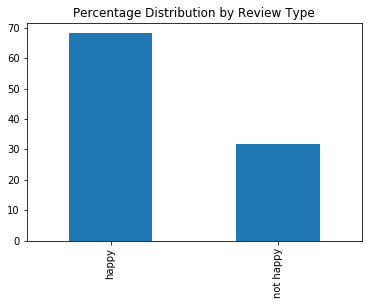

In [12]:
# Checking for the DISTRIBUTION of DEFAULT

import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for Default\n')
print(round(Reviewdata.Is_Response.value_counts(normalize = True) * 100,2))
round(Reviewdata.Is_Response.value_counts(normalize = True) * 100,2).plot(kind='bar')
plt.title('Percentage Distribution by Review Type')
plt.show()

###### DROP IRRELEVANT COLUMNS

In [14]:
# Removing COlumns
Reviewdata.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'], inplace = True)

In [37]:
Reviewdata.Is_Response.unique()

array(['not happy', 'happy'], dtype=object)

###### APPLY FIRST LEVEL OF TEXT CLEANING

In [16]:
# Apply FIRST LEVEL CLEANING

import re
import string

# This function converts to LOWER-CASE, REMOVES SQUARE BRACKETS, REMOVES NUMBERS and PUNCTUATION
def text_clean_1(text):
    text = text.lower()                                                 # Convert to LOWER-CASE
    text = re.sub('\[.*?\]', '', text)                                  # '\[.*?\]' Remove SQUARE BRACKETS
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)     # '[%s]' Remove PUNCTUATION
    text = re.sub('\w*\d\w*', '', text)                                 # '\w*\d\w*' Remove DIGITS
    return text

cleaned1 = lambda x: text_clean_1(x)

###### ADD COLUMN WITH FIRST-LEVEL CLEANED DATA

In [17]:
# Add a new column with cleaned data to existing dataset
Reviewdata['Cleaned_description'] = pd.DataFrame(Reviewdata.Description.apply(cleaned1))
Reviewdata.head()

,Description,Is_Response,Cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...


###### APPLY SECOND LEVEL OF TEXT CLEANING

In [21]:
# Apply a SECOND ROUND of Cleaning
def text_clean_2(text):
    text = re.sub('[''""...]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

###### ADD COLUMN WITH SECOND-LEVEL CLEANED DATA

In [32]:
# Add another column with more cleaner data
Reviewdata['Cleaned_description_new'] = pd.DataFrame(Reviewdata['Cleaned_description'].apply(cleaned2))
# This also works: Reviewdata['cleaned_description_new'] = pd.DataFrame(Reviewdata.Cleaned_description.apply(cleaned2))
Reviewdata.head(20)

,Description,Is_Response,Cleaned_description,Cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...,wonderful staff great location but it was defi...


###### MODEL SPLITTING - TRAIN_TEST_SPLIT

In [33]:
# Import Library
from sklearn.model_selection import train_test_split

# Define INDEPENDETN & DEPENDENT VARIABLES
Independent_var = Reviewdata.Cleaned_description_new
Dependent_var = Reviewdata.Is_Response

# Create TRAIN-TEST SPLIT
IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 422)

print('IV_train: ', len(IV_train))
print('IV_test: ', len(IV_test))
print('DV_train: ', len(DV_train))
print('DV_test: ', len(DV_test))

IV_train:  35038
IV_test:  3894
DV_train:  35038
DV_test:  3894


###### CREATE INSTANCES FOR TFIDFVECTORIZER AND LOGISTIC_REGRESSION

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = 'lbfgs')

from sklearn.pipeline import Pipeline

###### CREATE MODEL AND FIT MODEL ON TRAINING SET

In [35]:
model = Pipeline([('vectorizer', tvec), ('classifier', clf2)])

model.fit(IV_train, DV_train)

array([[2476,  305],
       [ 180,  933]], dtype=int64)

###### DO PREDICTION ON TEST_SET AND CREATE CONFUSION_MATRIX

In [43]:
from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[2476,  305],
       [ 180,  933]], dtype=int64)

###### MODEL PREDICTIONS

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy: ", accuracy_score(predictions, DV_test))
print("Precision: ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recal: ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy:  0.8754494093477144
Precision:  0.8811823966573809
Recal:  0.8754494093477144


###### TESTING AN EXAMPLE

In [42]:
example = ["I'm fine, but even happy"]
result = model.predict(example)
print(result)

['happy']
